In [5]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook

In [6]:
dt = np.dtype(np.int32).newbyteorder(">")
freq = np.linspace(0, 250, num=1024, endpoint=False)

def get_max(d):
    """
    Max val
    """
    return np.max(d[1:])

def read_dat(id_num, module):
    """
    id
    module : fem or pam
    """
    if module == "fiber":
        path = f"data/oct24/{module}/{module}{id_num}.npz"
        d = np.frombuffer(np.load(path)["3"], dtype=dt).astype(float)
        data = d
        norm_data = norm_d
    
    else:
        data = {}
        norm_data = {}  # peak normalized
        for pol in ["north", "east"]:
            path = f"data/oct24/{module}/{module}{id_num}_{pol}.npz"
            d = np.frombuffer(np.load(path)["3"], dtype=dt).astype(float)
            norm_d = d / get_max(d)
            data[pol] = d
            norm_data[pol] = norm_d
    
    return data, norm_data

def all_data(id_nums, module):
    data = {}
    norm_data = {}
    for id_num in id_nums:
        d, nd = read_dat(id_num, module)
        data[id_num] = d
        norm_data[id_num] = nd
    return data, norm_data

In [7]:
def plot_data(data, id_nums):
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(freq, d[pol], label=f"{id_num}: {pol}")
    plt.legend()
    plt.show()
    
def plot_norm(data, id_nums, ref_max):
    """
    data : dict, peak normalized data
    id_nums : list of str
    ref_max : float, value to set peak to
    """
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(freq, d[pol] * ref_max, label=f"{id_num}: {pol}")
    plt.legend()
    #plt.ylim(0, 1e6)
    plt.show()
    
def plot_ratio(data, id_nums, ref_id, ref_pol="east"):
    """
    Ratio between all the signals and a reference signal. The reference signal is specfied by
    ``ref_id'' and ``ref_pol''.
    
    data : dict, peak normalized data
    id_nums : list of str
    ref_id : the id to normalize by
    ref_pol : the pol to normalize by
    """
    ref_signal = data[ref_id][ref_pol]
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")
    plt.legend()
    #plt.ylim(0, 1e6)
    plt.show()
    
def plot_noise(data, id_nums):
    plt.figure()
    for id_num in id_nums:
        d = data[id_num]
        for pol in ["north", "east"]:
            plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
    plt.legend(bbox_to_anchor=[1., 1.])
    plt.ylim(-0.5, 0.5)
    plt.show()

## FEMs
Fiber: G1

PAM: 378, EAST input, attenuation: east = 8, north = 8

SNAP: C000091, E6 input

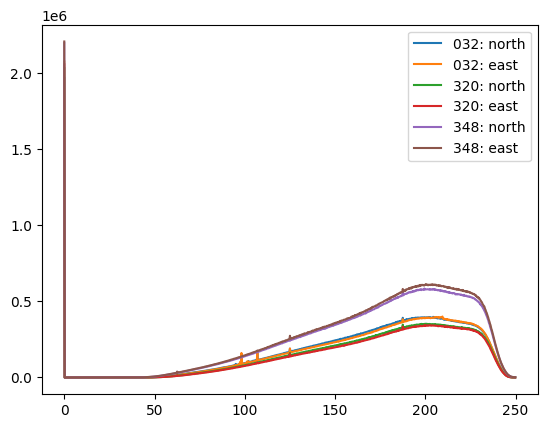

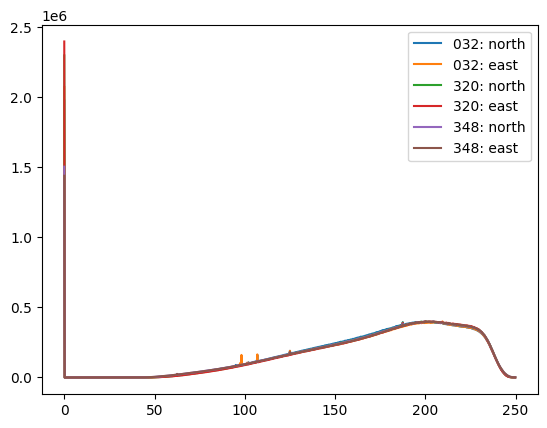

/tmp/ipykernel_220060/1575926371.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_220060/1575926371.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")


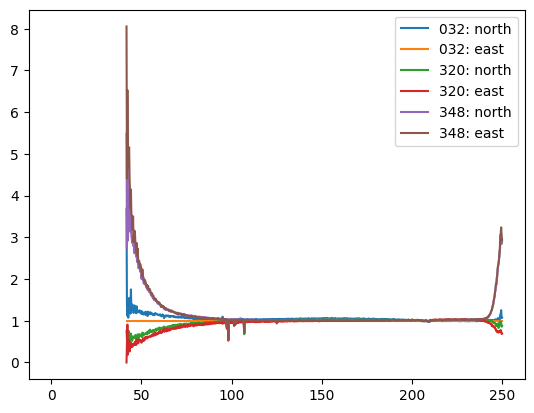

/tmp/ipykernel_220060/1575926371.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_220060/1575926371.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


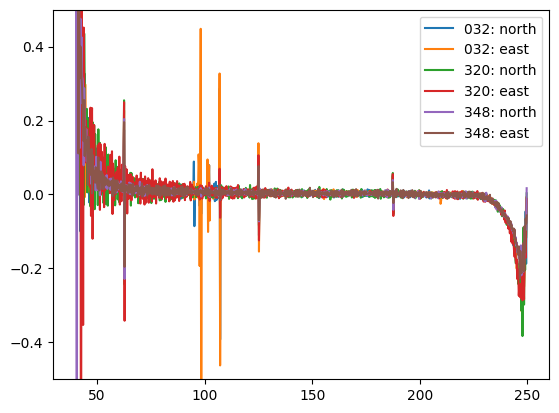

In [9]:
FEMS = ["032", "320", "348"]  # 012 requires surgery
fem_data, fem_norm = all_data(FEMS, "fem")

plot_data(fem_data, FEMS)
plot_norm(fem_norm, FEMS, get_max(fem_data["032"]["east"]))
plot_ratio(fem_norm, FEMS, "032", ref_pol="east")
plot_noise(fem_data, FEMS)

## PAMs

Fiber: G1

FEM: 032, EAST input

PAM attenuation: east = 8, north = 8

SNAP: C000091, E6 input

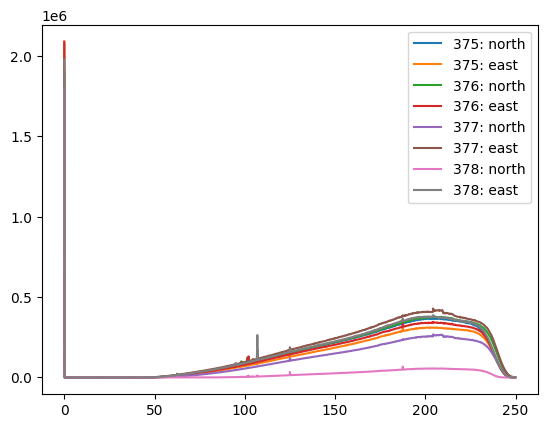

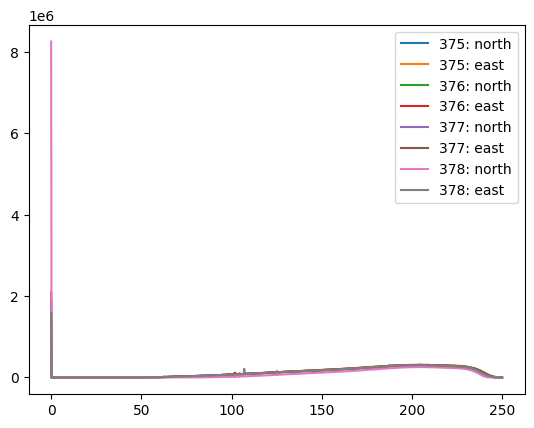

/tmp/ipykernel_220060/1575926371.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_220060/1575926371.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")


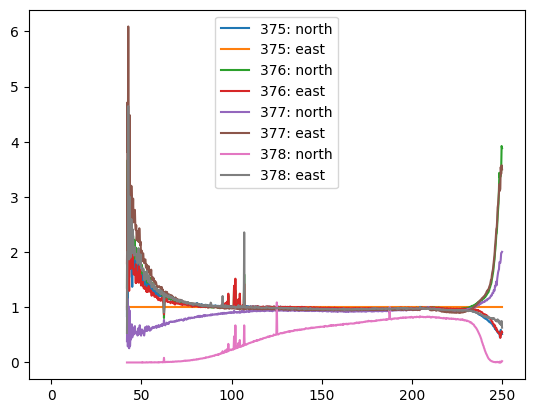

/tmp/ipykernel_220060/1575926371.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_220060/1575926371.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


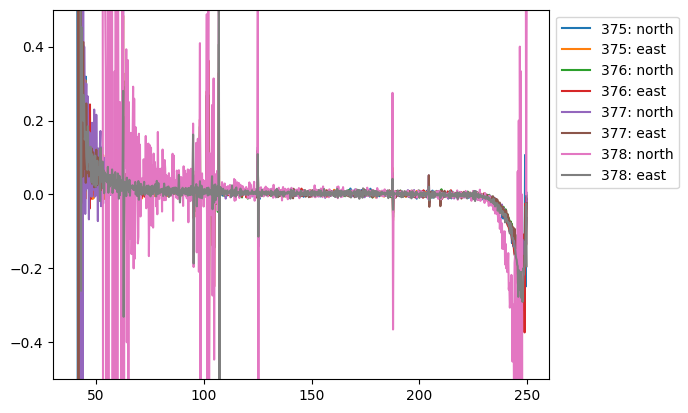

In [10]:
PAMS = ["375", "376", "377", "378"]
pam_data, pam_norm = all_data(PAMS, "pam")

plot_data(pam_data, PAMS)
plot_norm(pam_norm, PAMS, get_max(pam_data["375"]["east"]))
plot_ratio(pam_norm, PAMS, "375", ref_pol="east")
plot_noise(pam_data, PAMS)

## Fiber 

#### NOTE: fibers are labeled by 1 and 2, we label them here EAST and NORTH. 1 = east, 2 = north.

FEM: 032, EAST input

PAM 377, NORTH input, attenuation = 8

SNAP: C000091, E6 input

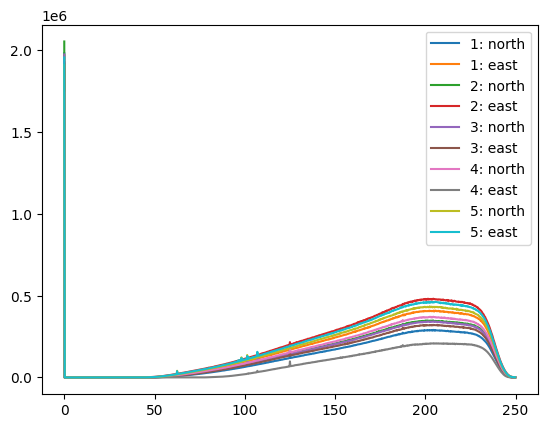

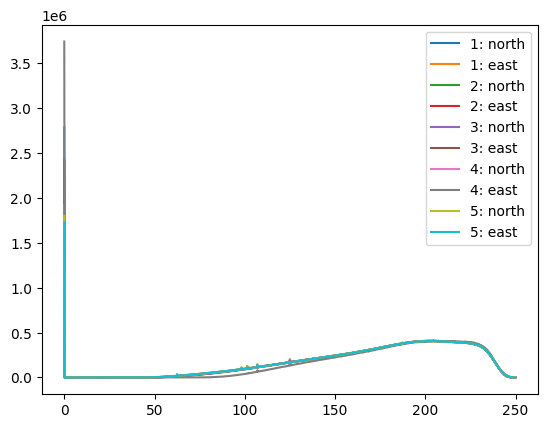

/tmp/ipykernel_219884/1575926371.py:40: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")
/tmp/ipykernel_219884/1575926371.py:40: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq, d[pol] / ref_signal, label=f"{id_num}: {pol}")


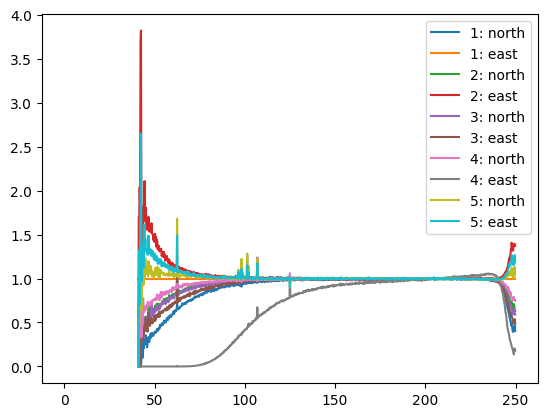

/tmp/ipykernel_219884/1575926371.py:50: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")
/tmp/ipykernel_219884/1575926371.py:50: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq[1:], np.diff(d[pol]) / d[pol][1:], label=f"{id_num}: {pol}")


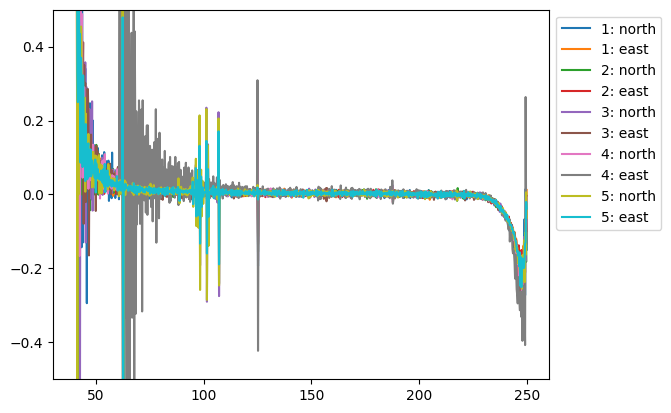

In [6]:
FIBERS = ["G"]
fiber_data, fiber_norm = all_data(FIBERS, "fiber")

plot_data(fiber_data, FIBERS)
plot_norm(fiber_norm, FIBERS, get_max(fiber_data["1"]["east"]))
plot_ratio(fiber_norm, FIBERS, "1", ref_pol="east")
plot_noise(fiber_data, FIBERS)

## SNAP  C000091


FEM: 032, EAST input

PAM 377, NORTH input, attenuation = 8

Fiber G1

Finger-tight

In [12]:
# mapping from SNAP inputs to the numbers we store the data with
snap_inputs = {"N0": "0", "N4": "2", "N8": "4", "E2": "1", "E6": "3", "E10": "5"}

def read_SNAP_dat(id_num):
    """
    id
    """
    data = {}
    norm_data = {}  # peak normalized
    for inp in snap_inputs:
        path = f"data/oct24/snap/{id_num}/{inp}.npz"
        d = np.frombuffer(np.load(path)[snap_inputs[inp]], dtype=dt).astype(float)
        norm_d = d / get_max(d)
        data[inp] = d
        norm_data[inp] = norm_d
    
    return data, norm_data

def plot_SNAP_data(data, log=False):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_norm(data, ref_max, log=False):
    """
    data : dict, peak normalized data
    ref_max : float, value to set peak to
    """
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d * ref_max, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_ratio(data, ref_inp="N0", log=False):
    """
    Ratio between all the signals and a reference signal. The reference signal is specfied by
    ``ref_inp''.
    
    data : dict, peak normalized data
    ref_inp : the input signal to normalize by
    """
    ref_signal = data[ref_inp]
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq, d / ref_signal, label=f"{inp}")
    plt.legend()
    if log:
        plt.yscale("log")
    plt.show()
    
def plot_SNAP_noise(data):
    plt.figure()
    for inp in data:
        d = data[inp]
        plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")
    plt.legend()
    plt.ylim(-0.5, 0.5)
    plt.show()

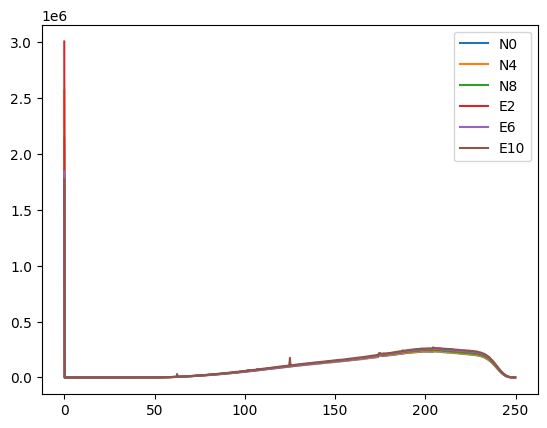

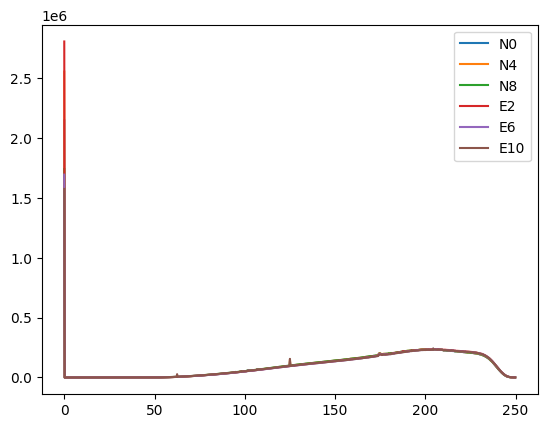

/tmp/ipykernel_220060/3103262901.py:55: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq, d / ref_signal, label=f"{inp}")
/tmp/ipykernel_220060/3103262901.py:55: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq, d / ref_signal, label=f"{inp}")


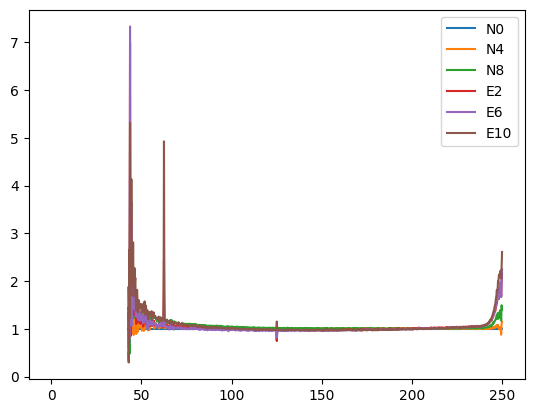

/tmp/ipykernel_220060/3103262901.py:65: RuntimeWarning: divide by zero encountered in divide
  plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")
/tmp/ipykernel_220060/3103262901.py:65: RuntimeWarning: invalid value encountered in divide
  plt.plot(freq[1:], np.diff(d) / d[1:], label=f"{inp}")


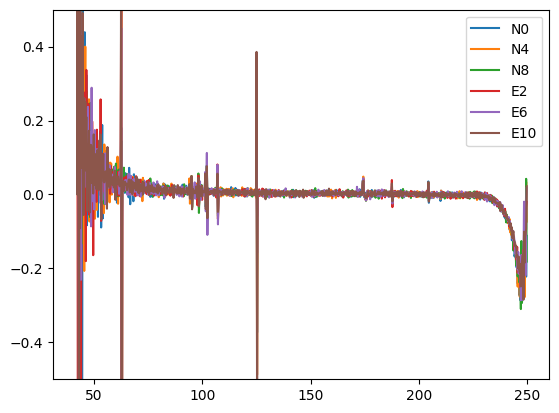

In [13]:
snap_c91_data, snap_c91_norm = read_SNAP_dat("C000091")

plot_SNAP_data(snap_c91_data)
plot_SNAP_norm(snap_c91_norm, get_max(snap_c91_data["N0"]))
plot_SNAP_ratio(snap_c91_norm, ref_inp="N0")
plot_SNAP_noise(snap_c91_data)